# 1장. 제어문

## 1절 | 조건문(if/else, ifelse())

### 1. if/else
Q) 정수를 입력받아 해당 숫자가 짝수인지 홀수인지 판단하고, 만약 입력받은 숫자가 정수가 아닐 경우 “정수를 입력해주세요.”라는 문구를 출력하는 if문을 작성.

In [ ]:
def is_int(str):
    try:
        n = int(str)
        return True
    except ValueError:
        return False


n = input('짝/홀수를 판별합니다. 정수를 입력하세요. >')


try:
    if int(n)%2 == 0:
        print(n,': 짝수입니다.')
    else:
        print(n,': 홀수입니다.')
        
except:
      print('입력한 데이터는 정수가 아닙니다.')

### 2. ifelse
Q) 정수를 입력받아 짝수이면 “짝수입니다.”, 홀수이면 “홀수입니다.”를 출력하고, 
정수가 아닐 경우 “정수가 아닙니다.”를 출력하는 ifelse문을 작성. 


## 2절 | 반복문(for, while, repeat)

### 1. for

Q) 반복문을 사용하지 않은 경우 : print 함수를 4번 실행

In [ ]:
print('"The year is 2015"')
print('"The year is 2016"')
print('"The year is 2017"')
print('"The year is 2018"')

Q) 반복문을 사용한 경우 : for문을 1번 실행

In [ ]:
year = list(range(2015,2019))    # 2015년~2018년 까지의 연도 리스트 생성  


In [ ]:
# 방법 1

for x in year:
    print('"The year is', x, '"')

In [ ]:
# 방법 2
# {}.format() : format 함수 괄호 안의 [숫자를 문자열로 변환!!]하여 순차적으로 {}에 넣는다. 

i = 0   # i 값 초기화
        # clear kernel 상태에서 i=0 을 빼고 실행하면 Error 발생
        # i=0 을 넣고 실행한 후, i=0 을 삭제하고 코드 실행을 반복해보면 i 가 이전 출력에 이어서 계속 증가
        
for x in year:
    print('"The year is {}"'.format(x))
    i += 1      # += 숫자 덧셈 후 대입 (또는 문자열 연결 후 대입)


### 2. while

Q) for문을 사용하여 해결했던 예제에 대해 while문을 이용해서 똑같은 결과값을 출력

In [ ]:
i = 2015

while i < 2019:
    print('"The year is {}"'.format(i))
    i += 1

### 3. repeat

#### break : 지정한 조건을 만족하면 반복문 종료

1~10 까지의 숫자 중 짝수만 출력하기

In [ ]:
for i in range(1,100):
    print(i)
    i += 1
    if i == 10:
        break

#### continue : 현재 수행중인 반복문을 계속 실행. (continue 이후의 명령은 수행하지 않는다.)

1~10 까지의 숫자 중 홀수만 출력하기
반복문 내의 next를 만나면 print(i)를 실행하지 않고 for문의 맨 처음으로 이동

# 2장. 데이터 변환

## 1절 | 파생변수 생성

### 1. data.frame에서의 변수추가

In [ ]:
Q) R의 내장 데이터 iris에 행번호를 담고 있는 ‘ID’ 라는 변수를 새로 생성

In [ ]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris_data = iris.data

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['lable'] = iris.target
iris_df

In [ ]:
iris_df['ID'] = list(range(1,151))

In [ ]:
iris_df

Q) 생성했던 ID 변수의 값이 짝수이면 A, 홀수이면 B로 분류하는 새로운 변수(변수명 : Group)를 생성

딕셔너리 사용

np.where 사용

In [ ]:
iris['Group'] = np.where( iris_df['ID'].values % 2 == 0), 'Even', 'Odd'

apply 사용

In [ ]:
def odd(x):
    try:
        if int(x)%2 == 0:
            return 'even'
        else:
            return 'Odd'
        
    except:
        print('Error')   

In [ ]:
iris_df['Group'] = iris_df['ID'].apply(lambda x : odd(x))

In [ ]:
iris_df

Q) iris 데이터에서 Sepal.Length 변수와 Petal.Length 변수의 값을 더하여 ‘Sum.Length’ 라는 새로운 변수를 생성해보자.

In [ ]:
iris_df['Sum.Length'] = iris_df['sepal length (cm)'] + iris_df['petal length (cm)']

In [ ]:
iris_df

### [ Question ]
- 학생의 id(s1, s2, s3, s4, s5, s6)를 담은 student_id 변수와 시험점수(55, 90, 85, 71, 63, 99)를 담은 score 변수로 구성된 데이터프레임을 생성

- 그 후 시험점수가 90점 이상이면 수, 80점 이상 90점 미만이면 우, 70점 이상 80점 미만이면 미, 60점 이상 70점 미만이면 양, 60점 이하이면 가로 분류하는 ‘grade’ 라는 변수를 새롭게 생성

In [1]:
import numpy as np
import pandas as pd
import sklearn

# 데이터 프레임 생성 - 개별 생성
df_student = pd.DataFrame()

df_student['ID'] = ['s1', 's2', 's3', 's4', 's5', 's6']
df_student['Score'] = [55, 90, 85, 71, 63, 99]

df_student

,ID,Score
0,s1,55
1,s2,90
2,s3,85
3,s4,71
4,s5,63
5,s6,99


In [2]:
def grade(x):
    if x >= 90:
        return '수'
    elif x >=80:
        return '우'
    elif x >=70:
        return '미'
    elif x >=60:
        return '양'
    else:
        return '가'


df_student['Grade'] = df_student['Score'].apply(lambda x : grade(x))

In [3]:
df_student

,ID,Score,Grade
0,s1,55,가
1,s2,90,수
2,s3,85,우
3,s4,71,미
4,s5,63,양
5,s6,99,수


## 2절 | 변수 축소

### 1. 주성분분석

#### [ Question ]
- R에 내장된 USArrests 데이터는 1973년 미국 50개주 100,000명의 인구 당 체포된 세 가지 강력범죄수(assault, murder, rape)와 각 주마다 도시에 거주하는 인구의 비율(%)로 구성되어있다.
- 주성분 분석을 수행하여 해당 데이터의 변수들을 가장 잘 요약하는 주성분을 구하고 해석하라.

In [22]:
import numpy as np
import pandas as pd

# 차원축소를 위한 패키지
from sklearn.decomposition import PCA

import seaborn as sb
import matplotlib.pyplot as plt

In [13]:
df_arrests = pd.read_csv( "C:/Users/Administrator/GitHub/TIL/ADP_study/USArrests.csv" )

In [42]:
display(df_arrests.head())
display(df_arrests.describe())
display(df_arrests.info())

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


None

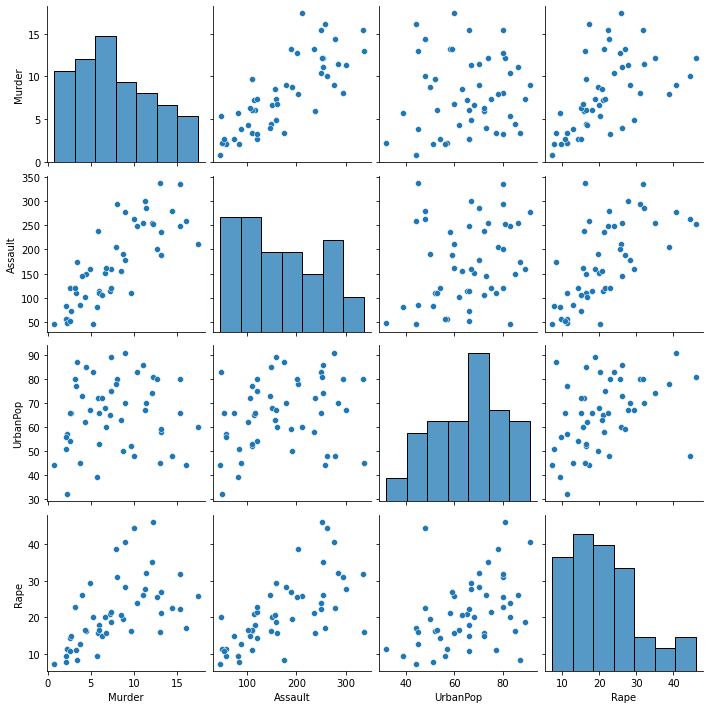

In [45]:
sb.pairplot(df_arrests, diag_kind='hist')
plt.show()